### Python Libraries

In [258]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset - Youtube Global Statistics

In [259]:
youtube_df = pd.read_csv("Global YouTube Statistics.csv", encoding='iso-8859-1')

In [260]:
# 995 rows, 28 columns (uncleaned)
youtube_df.shape

(995, 28)

In [261]:
# get names of each column
for i, col in enumerate(youtube_df.columns):
    print(i, col)

0 rank
1 Youtuber
2 subscribers
3 video views
4 category
5 Title
6 uploads
7 Country
8 Abbreviation
9 channel_type
10 video_views_rank
11 country_rank
12 channel_type_rank
13 video_views_for_the_last_30_days
14 lowest_monthly_earnings
15 highest_monthly_earnings
16 lowest_yearly_earnings
17 highest_yearly_earnings
18 subscribers_for_last_30_days
19 created_year
20 created_month
21 created_date
22 Gross tertiary education enrollment (%)
23 Population
24 Unemployment rate
25 Urban_population
26 Latitude
27 Longitude


# **EXPLORATORY DATA ANALYSIS**

1. Sample EDA Question?

    **Description**:

    **Variables**: `zzz` and `zzz`

    **Numerical Summary**: 

    **Visualization**: 

In [262]:
# show category values
youtube_df['category'].unique()

# what is type of category
type(youtube_df['category'][0])

str

### 1. What are the lowest and highest yearly earning categories?

**Description**:
- This analysis aims to identify and explore the YouTube content categories or niches that yield the lowest and highest yearly earnings.

**Variables**:
- `category`
- `lowest_yearly_earnings`
- `highest_yearly_earnings`

**Numerical Summary**

Get the lowest and highest yearly earnings of Youtube Channels per category.

In [263]:
# show first 10 lowest_yearly_earnings values
youtube_df['lowest_yearly_earnings'].head(10)

0    6800000.00
1          0.04
2    4000000.00
3    5900000.00
4    5500000.00
5          0.00
6    2200000.00
7     117600.00
8     146800.00
9    1700000.00
Name: lowest_yearly_earnings, dtype: float64

In [264]:
# show first 10 highest_yearly_earnings values
youtube_df['highest_yearly_earnings'].head(10)

0    1.084000e+08
1    5.800000e-01
2    6.470000e+07
3    9.480000e+07
4    8.750000e+07
5    0.000000e+00
6    3.510000e+07
7    1.900000e+06
8    2.300000e+06
9    2.790000e+07
Name: highest_yearly_earnings, dtype: float64

**Visualization**

Create a box plot to visualize the lowest and highest yearly earnings categories, showing how they compare to one another.

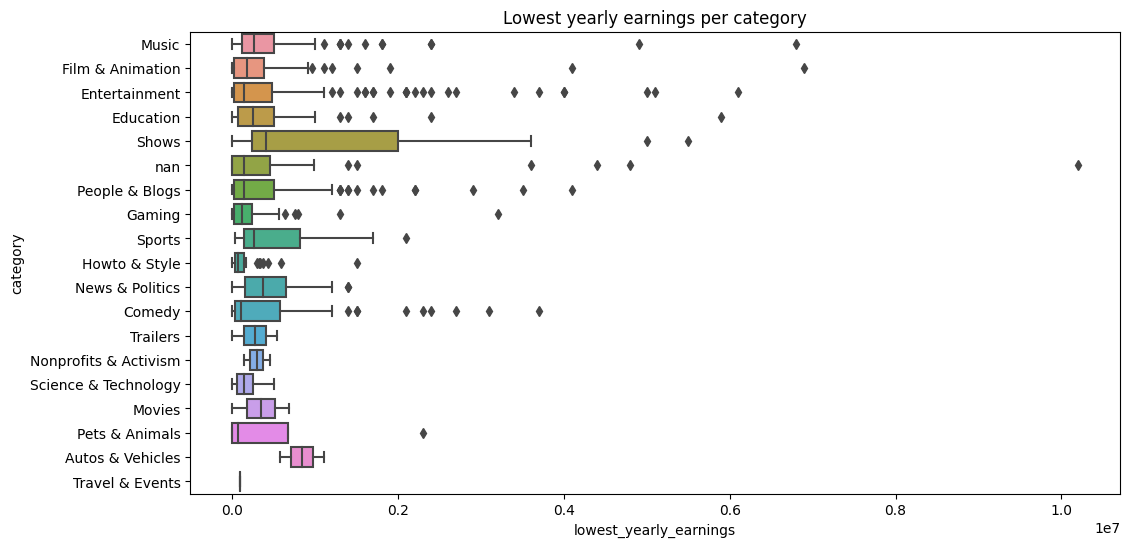

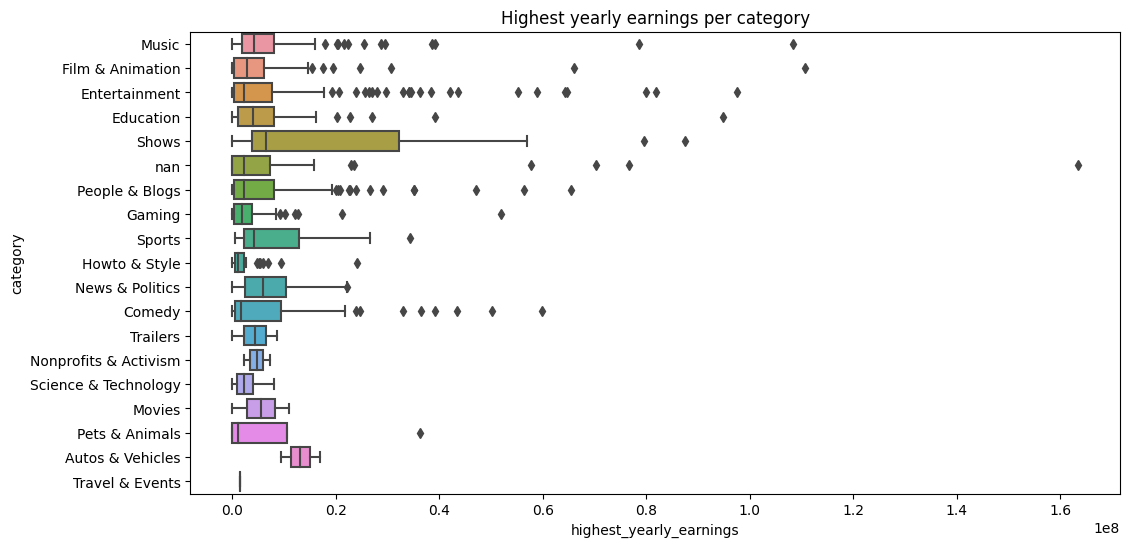

In [265]:
# make category as string
youtube_df['category'] = youtube_df['category'].astype(str)

# create horizontal box chart for lowest yearly earnings
plt.figure(figsize=(12, 6))
sns.boxplot(x='lowest_yearly_earnings', y='category', data=youtube_df)
plt.title('Lowest yearly earnings per category')
plt.show()

# create horizontal box chart for highest yearly earnings youtube channels per category
plt.figure(figsize=(12, 6))
sns.boxplot(x='highest_yearly_earnings', y='category', data=youtube_df)
plt.title('Highest yearly earnings per category')
plt.show()

**Conclusion**

### 2. Is there a correlation between video views and subscriber counts on YouTube channels?

**Description**
- This analysis investigates the relationship between the number of video views and the number of subscribers on YouTube channels to determine if there's a correlation indicating viewer engagement.

**Variables**
- `video views`
- `subscribers`

**Numerical Summary**

Calculate the Pearson correlation coefficient to quantify the strength and direction of the correlation between video views and subscribers.


In [266]:
# calculate pearson correlation betwen video views and subscribers
youtube_df['video views'].corr(youtube_df['subscribers'])


0.7509576173780214

**Visualization**

Create a scatterplot to visualize the relationship between video views and subscribers, indicating the nature of the correlation.

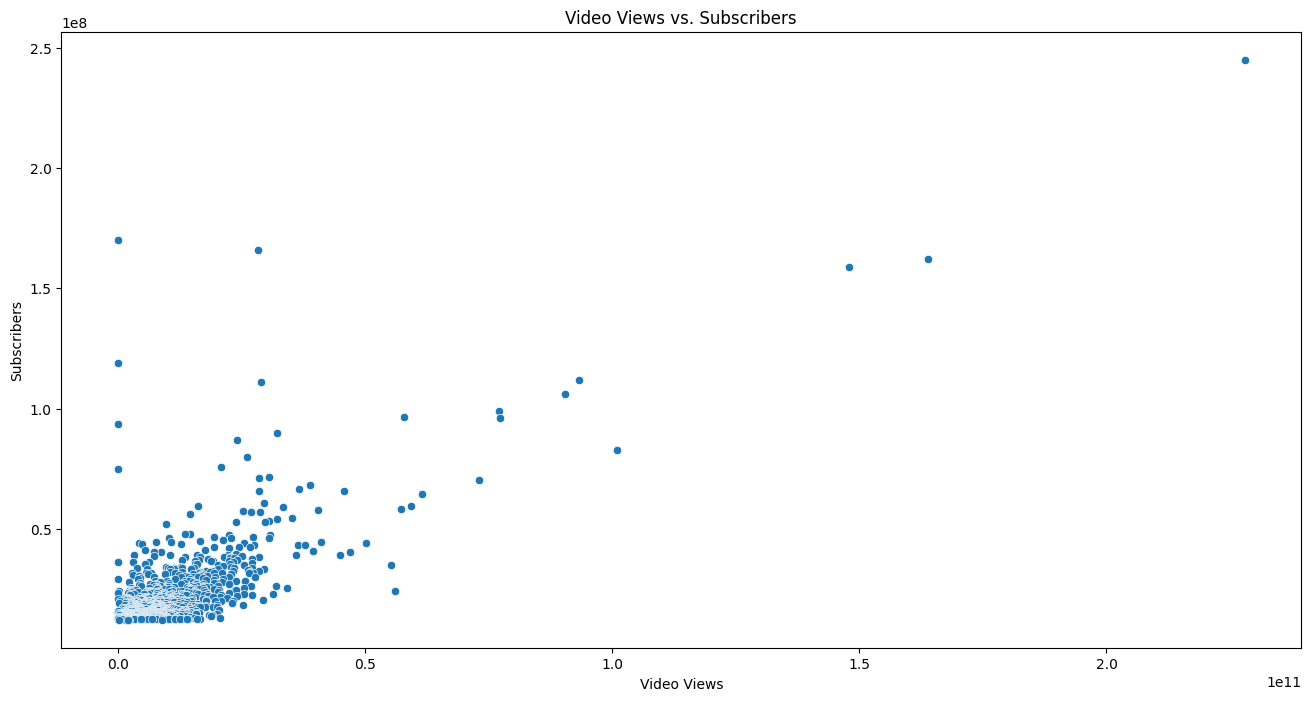

In [267]:
# scatterplot by using
plt.figure(figsize=(16, 8))
sns.scatterplot(x='video views', y='subscribers', data=youtube_df)
plt.xlabel('Video Views')
plt.ylabel('Subscribers')
plt.title('Video Views vs. Subscribers')
plt.show()

**Conclusion**

### 3. Is there a correlation between video views and average yearly earnings on YouTube channels?

**Description**
- This analysis explores whether there's a correlation between the number of video views and the monthly earnings of YouTube channels, offering insights into the monetization potential of views.

**Variables**
- `video views`
- `lowest_yearly_earnings`
- `highest_yearly_earnings`

**Numerical Summary**

Calculate the correlation coefficient to determine the strength and direction of the correlation between video views and average yearly earnings

In [268]:
# calculate average yearly earnings
youtube_df['avg_yearly_earnings'] = (youtube_df['lowest_yearly_earnings'] + youtube_df['highest_yearly_earnings']) / 2

# calculate pearson correlation betwen video views and average yearly earnings
youtube_df['video views'].corr(youtube_df['avg_yearly_earnings'])

0.5521326996564042

**Visualization**

Create a scatterplot to visualize the relationship between video views and average yearly earnings, highlighting the nature of the correlation.


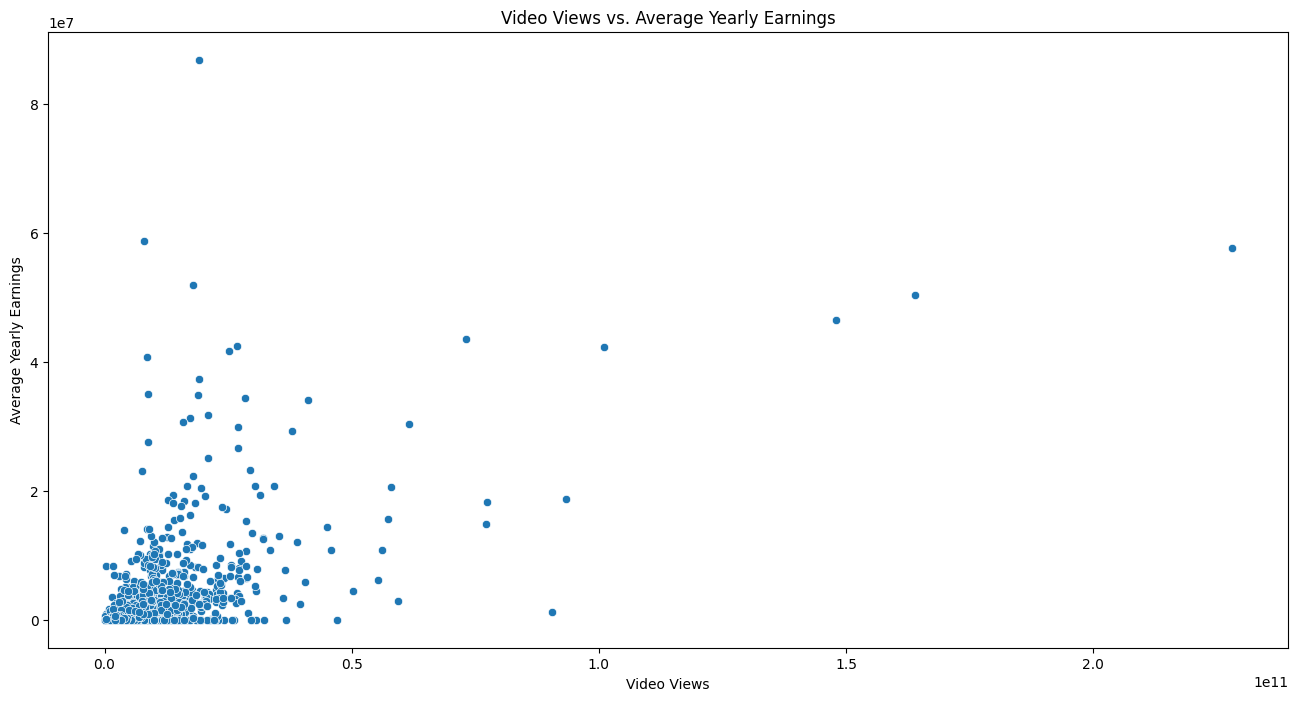

In [269]:
# visuliaze the data
plt.figure(figsize=(16, 8))
sns.scatterplot(x='video views', y='avg_yearly_earnings', data=youtube_df)
plt.xlabel('Video Views')
plt.ylabel('Average Yearly Earnings')
plt.title('Video Views vs. Average Yearly Earnings')
plt.show()

**Conclusion**

### 4. Are there discernible patterns related to a YouTube channel's category and its subscribers?


**Description**:
- We aim to explore if there are discernible patterns related to a YouTube channel's category and its subscribers. We will perform numerical summary and visualization to analyze the data.

**Variables**:
- `subscribers` : The number of subscribers for YouTube channels.
- `category` : The category of the YouTube channels.


**Numerical Summary**

We calculated summary statistics for the `subscribers` column using youtube_df['subscribers'].describe(). The subscribers column represents the `average number of subscribers` for each YouTube channel within their respective categories.

In [272]:
subscribers_summary = youtube_df['subscribers'].describe()

**Visualization**

We created a horizontal bar chart to display the average subscribers for each category, using the average_subscribers_by_category variable. The x-axis represents the average subscribers (in millions), and the y-axis displays the categories. The chart is color-coded for better visualization.

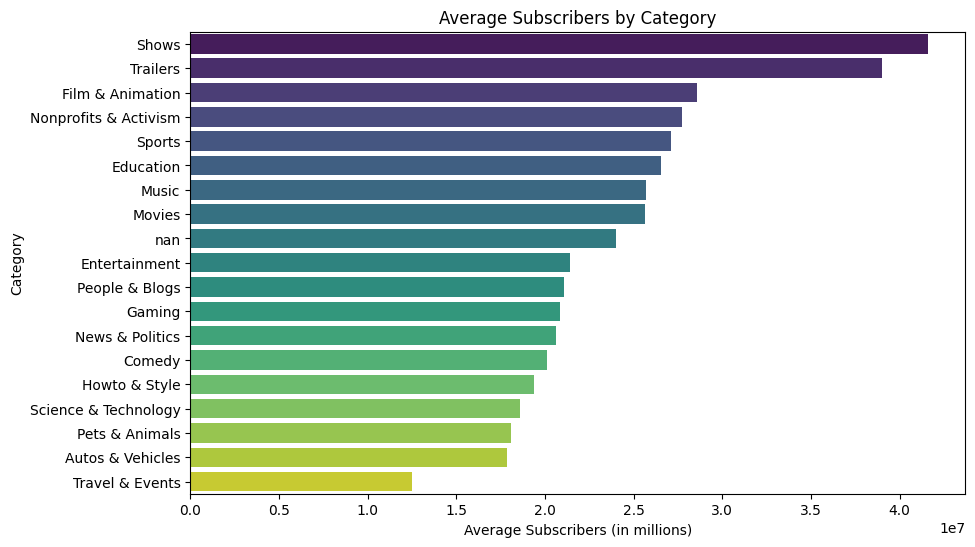

In [273]:
# Bar Chart - Average Subscribers by Category
average_subscribers_by_category = youtube_df.groupby('category')['subscribers'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=average_subscribers_by_category.values, y=average_subscribers_by_category.index, palette="viridis", orient="h")
plt.title('Average Subscribers by Category')
plt.xlabel('Average Subscribers (in millions)')
plt.ylabel('Category')
plt.show()

**Conclusion**

From our analysis, we have found discernible patterns related to a YouTube channel's category and its subscribers. The analysis revealed the following:

- Shows had the highest average number of subscribers, with an average of over 4 million subscribers.

- Trailers came in second place in terms of average subscribers.

- Film & Animation occupied the third position in terms of average subscribers.

- Pets & Animals had the third-to-last position with lower average subscribers.

- Autos & Vehicles ranked second to last in terms of average subscribers.

- Travel & Events was the category with the lowest average number of subscribers.

These patterns suggest that the type of content and category significantly influences the average number of subscribers on YouTube channels. Channels in the "Shows" category, on average, tend to have the most subscribers, while those in the "Travel & Events" category have the fewest. This information can be valuable for content creators and marketers looking to understand subscriber trends on YouTube.

### 5. Are there discernible patterns related to a YouTube channel's category and its average yearly earnings?

**Description**:
- We aim to investigate if there are discernible patterns related to a YouTube channel's category and its average yearly earnings. We will conduct numerical summary and visualization to analyze the data.


**Variables**:
- `category` : The category of the YouTube channels.
- `lowest_yearly_earnings` : The lowest estimated yearly earnings of the YouTube channels.
- `highest_yearly_earnings` : The highest estimated yearly earnings of the YouTube channels.


**Numerical Summary**

We will calculate summary statistics for the 'average_yearly_earnings' column, which is the sum of the lowest and highest yearly earnings. This column represents the average yearly earnings for each YouTube channel within their respective categories.

In [274]:
youtube_df['average_yearly_earnings'] = youtube_df['lowest_yearly_earnings'] + youtube_df['highest_yearly_earnings']

**Visualization**

We will create a horizontal bar chart to visualize the average yearly earnings for each category, using the average_yearly_earnings_by_category variable. The x-axis will represent the average yearly earnings (in dollars), and the y-axis will display the categories. The chart will be color-coded for better visualization.

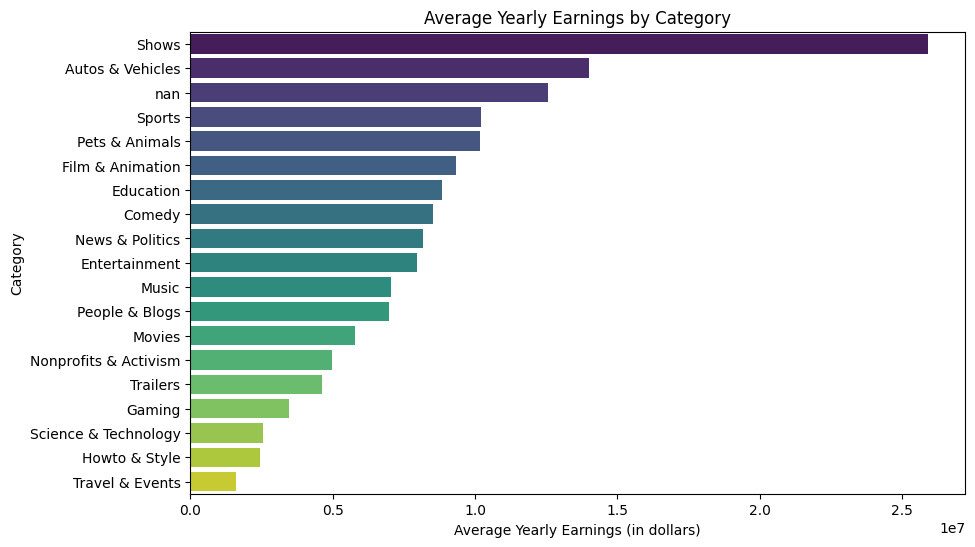

In [275]:
# Bar Chart - Average Yearly Earnings by Category
average_yearly_earnings_by_category = youtube_df.groupby('category')['average_yearly_earnings'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=average_yearly_earnings_by_category.values, y=average_yearly_earnings_by_category.index, palette="viridis", orient="h")
plt.title('Average Yearly Earnings by Category')
plt.xlabel('Average Yearly Earnings (in dollars)')
plt.ylabel('Category')
plt.show()

**Conclusion**

Conclusion:
From our analysis, we have found discernible patterns related to a YouTube channel's category and its average yearly earnings, calculated as the sum of the lowest and highest yearly earnings. The analysis reveals the following:

- Shows had the highest average yearly earnings, with an average of 2.5 million dollars.

- Autos & Vehicles came in second place in terms of average yearly earnings.

- Sports occupied the third position in terms of average yearly earnings.

- Science & Technology had the third-to-last position with lower average yearly earnings.

- Howto & Style ranked second to last in terms of average yearly earnings.

- Travel & Events was the category with the lowest average yearly earnings.

These patterns suggest that the category of content significantly influences the average yearly earnings of YouTube channels. Channels in the "Shows" category, on average, tend to have the highest earnings, while those in the "Travel & Evetns" category have the lowest earnings. This information can be valuable for content creators and marketers looking to understand earning trends on YouTube.

#### ***SUCCESS METRICS AND CORRELATIONS***

#### ***CATEGORIES AND ORIGIN***

### 6. What is the distribution of video views for YouTube channels within each content category?

**Description**:
- We aim to explore the distribution of video views for YouTube channels within each content category.


**Variables**:
- `category` : The category of the YouTube channels.
- `video views` : The number of video views for each YouTube channel.


**Numerical Summary**

Calculate the summary statistics for the 'video_views' column within each category. This will help us understand the distribution of video views, including measures like the median, quartiles, and potential outliers for each category.

In [276]:
# calculate mean of video views within each category 
views_summary = youtube_df.groupby('category')['video views'].describe()
views_summary

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
Autos & Vehicles,2.0,7.501729e+09,2.964426e+09,5.405563e+09,6.453646e+09,7.501729e+09,8.549812e+09,9.597895e+09
Comedy,69.0,7.972649e+09,6.406252e+09,1.001465e+09,3.294013e+09,5.863457e+09,1.043547e+10,3.430048e+10
Education,45.0,1.548032e+10,2.557214e+10,1.349289e+09,3.654622e+09,7.876741e+09,1.485729e+10,1.640000e+11
Entertainment,241.0,1.048854e+10,1.012820e+10,1.066458e+07,4.332275e+09,7.886440e+09,1.312465e+10,7.718017e+10
Film & Animation,46.0,1.183527e+10,1.089955e+10,0.000000e+00,5.448290e+09,8.660225e+09,1.346194e+10,5.931647e+10
Gaming,94.0,7.634456e+09,5.835934e+09,3.517633e+08,3.640754e+09,6.318769e+09,9.229631e+09,2.905804e+10
Howto & Style,40.0,5.045439e+09,4.300327e+09,1.002220e+09,2.758887e+09,3.690895e+09,5.927356e+09,2.623679e+10
Movies,2.0,7.691628e+09,3.353302e+09,5.320485e+09,6.506056e+09,7.691628e+09,8.877199e+09,1.006277e+10
Music,202.0,1.545286e+10,1.778278e+10,5.597655e+08,7.178961e+09,1.244479e+10,1.943864e+10,2.280000e+11


**Visualization**

Create a box plot to visually represent the distribution of video views for each category. Box plots are effective for showing the central tendency and spread of data within categories.

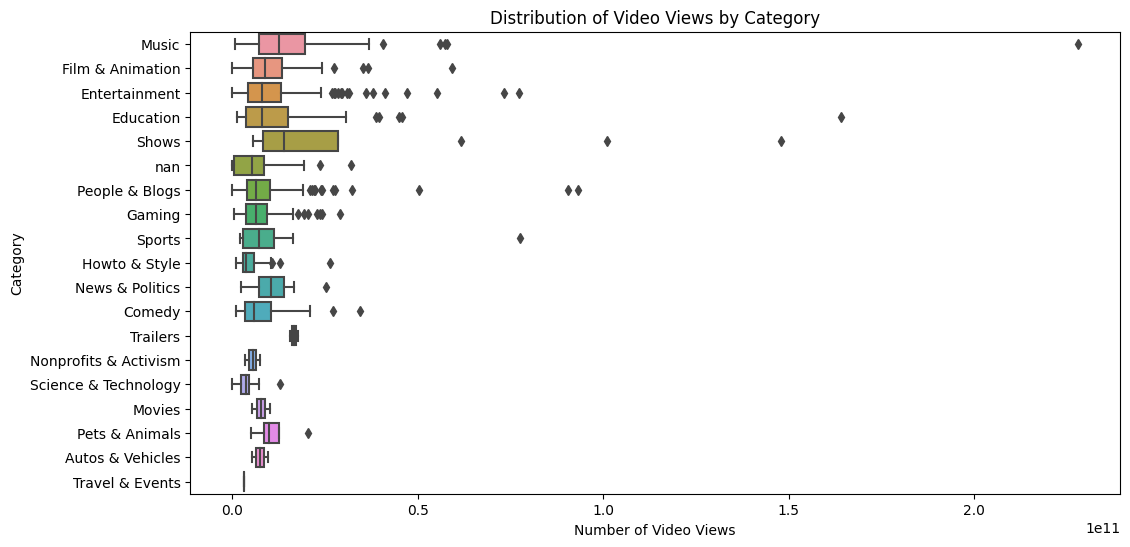

In [277]:
# Horizontal Box Plot - Distribution of Video Views by Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='video views', y='category', data=youtube_df)
plt.title('Distribution of Video Views by Category')
plt.xlabel('Number of Video Views')
plt.ylabel('Category')
plt.show()

**Conclusion**

### 7. What are the most prevalent YouTube channel categories in the dataset?

Description:
- How many channels are in each category?

Variables:
- `category`


Count the frequency of YouTube channels within each unique category.

In [278]:
category_counts = youtube_df['category'].value_counts()

Create a bar chart to visualize the distribution of YouTube channels across unique categories.

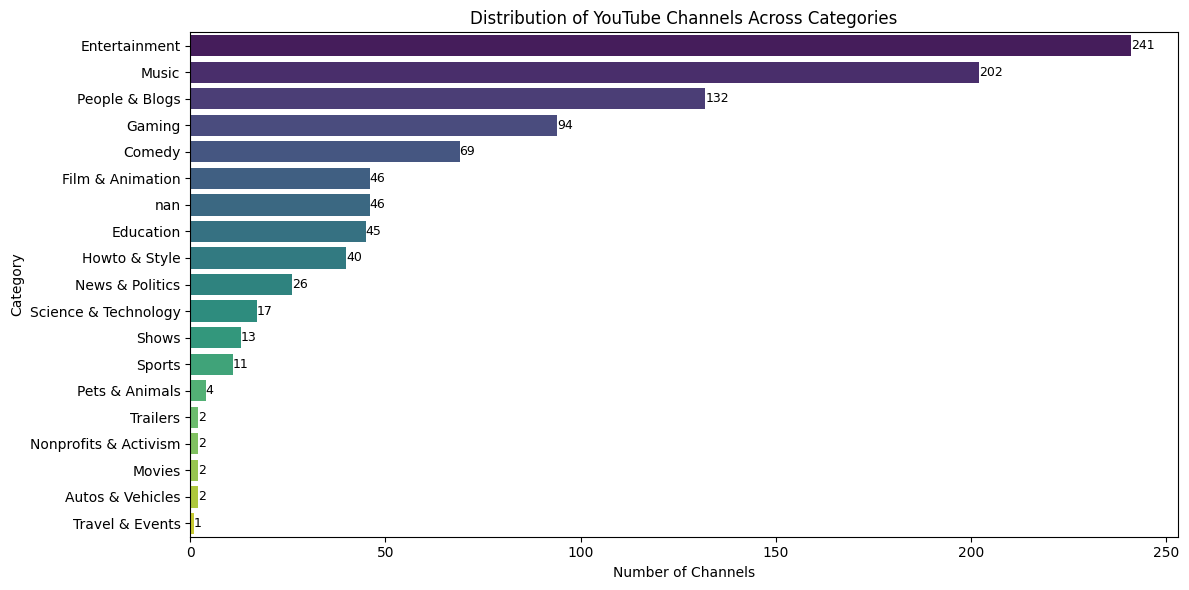

In [279]:
# create a bar chart to visualize the distribution of YouTube channels across categories
plt.figure(figsize=(12, 6))  # Adjust the figure size
ax = sns.barplot(x=category_counts.values, y=category_counts.index, palette="viridis", orient="h")
ax.set(xlabel='Number of Channels', ylabel='Category')
plt.title('Distribution of YouTube Channels Across Categories')

# Add data labels to the right of each bar for readability
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{int(width)}', xy=(width, p.get_y() + p.get_height() / 2), ha='left', va='center', fontsize=9, color='black')

plt.tight_layout()  # Ensure labels and titles fit in the plot area
plt.show()


##### Conclusion

### 8. What is the distribution of YouTube channels by their country of origin in the dataset? Retrieve the top 15 countries.

Description:
- aims to identify the top 15 countries with most amount of channels.

Variables:
- `Country`

Get the frequency of YouTube channels from each country.

In [280]:
country_counts = youtube_df['Country'].value_counts()


Retrieve the top 15 countries with most frequency of YouTube channels.

In [281]:
top_15_countries = country_counts[:15]

top_15_countries

Country
United States     313
India             168
Brazil             62
United Kingdom     43
Mexico             33
Indonesia          28
Spain              22
Thailand           18
South Korea        17
Russia             16
Canada             15
Argentina          13
Philippines        12
Colombia           11
Australia           9
Name: count, dtype: int64

Create a bar chart to visualize the distribution of YouTube channels by country – showing only the top 15.

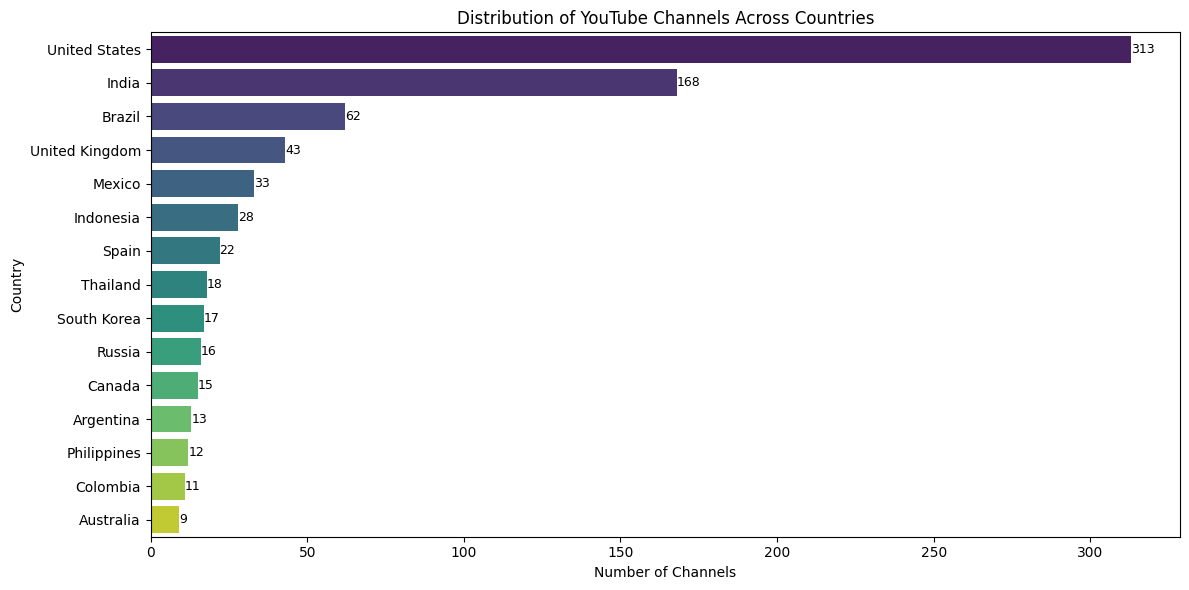

In [282]:
plt.figure(figsize=(12, 6))  # Adjust the figure size
ax = sns.barplot(x=top_15_countries.values, y=top_15_countries.index, palette="viridis", orient="h")
ax.set(xlabel='Number of Channels', ylabel='Country')
plt.title('Distribution of YouTube Channels Across Countries')

# Add data labels to the right of each bar for readability
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{int(width)}', xy=(width, p.get_y() + p.get_height() / 2), ha='left', va='center', fontsize=9, color='black')

plt.tight_layout()  # Ensure labels and titles fit in the plot area
plt.show()

##### Conclusion